# Лабораторная работа №6. Анализ и прогнозирование временного ряда.
## Задание
- Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
- Визуализируйте временной ряд и его основные характеристики.
- Разделите временной ряд на обучающую и тестовую выборку.
- Произведите прогнозирование временного ряда с использованием как минимум двух методов.
- Визуализируйте тестовую выборку и каждый из прогнозов.
- Оцените качество прогноза в каждом случае с помощью метрик.

In [33]:
#import библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В качестве данных для анализа, я взял датасет о посещяемости курса по программированию на языке R компании Stepik.

In [2]:
events_data = pd.read_csv('C:\data fo py/event_data_train.csv')
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [3]:
events_data['date']=pd.to_datetime(events_data.timestamp, unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [4]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [23]:
(events_data.groupby('day', as_index=False).count())

,day,step_id,timestamp,action,user_id,date
0,2015-06-15,37897,37897,37897,37897,37897
1,2015-06-16,22486,22486,22486,22486,22486
2,2015-06-17,16811,16811,16811,16811,16811
3,2015-06-18,15634,15634,15634,15634,15634
4,2015-06-19,12253,12253,12253,12253,12253
...,...,...,...,...,...,...
1065,2018-05-15,3132,3132,3132,3132,3132
1066,2018-05-16,3607,3607,3607,3607,3607
1067,2018-05-17,4012,4012,4012,4012,4012
1068,2018-05-18,3841,3841,3841,3841,3841


In [74]:
events_data.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

In [30]:
events_data.groupby('day', as_index=False).nunique().user_id

,day,step_id,timestamp,action,user_id,date
0,2015-06-15,90,17641,4,705,17641
1,2015-06-16,71,12409,4,526,12409
2,2015-06-17,94,9842,4,440,9842
3,2015-06-18,105,9284,4,411,9284
4,2015-06-19,83,7528,4,377,7528
...,...,...,...,...,...,...
1065,2018-05-15,187,2065,4,145,2065
1066,2018-05-16,193,2321,4,155,2321
1067,2018-05-17,196,2585,4,165,2585
1068,2018-05-18,186,2371,4,126,2371


In [75]:
data=pd.DataFrame()
data=events_data.groupby('day').user_id.nunique()

In [76]:
data.dtype

dtype('int64')

In [63]:
data=pd.DataFrame()
data['Data']= events_data.day.unique()
data['Actions']=events_data.groupby('day', as_index=False).nunique().user_id
data


,Data,Actions
0,2015-06-15,705
1,2015-06-16,526
2,2015-06-17,440
3,2015-06-18,411
4,2015-06-19,377
...,...,...
1065,2018-05-15,145
1066,2018-05-16,155
1067,2018-05-17,165
1068,2018-05-18,126


In [64]:
data.set_index('Data')

,Actions
Data,
2015-06-15,705
2015-06-16,526
2015-06-17,440
2015-06-18,411
2015-06-19,377
...,...
2018-05-15,145
2018-05-16,155
2018-05-17,165


<AxesSubplot:xlabel='day'>

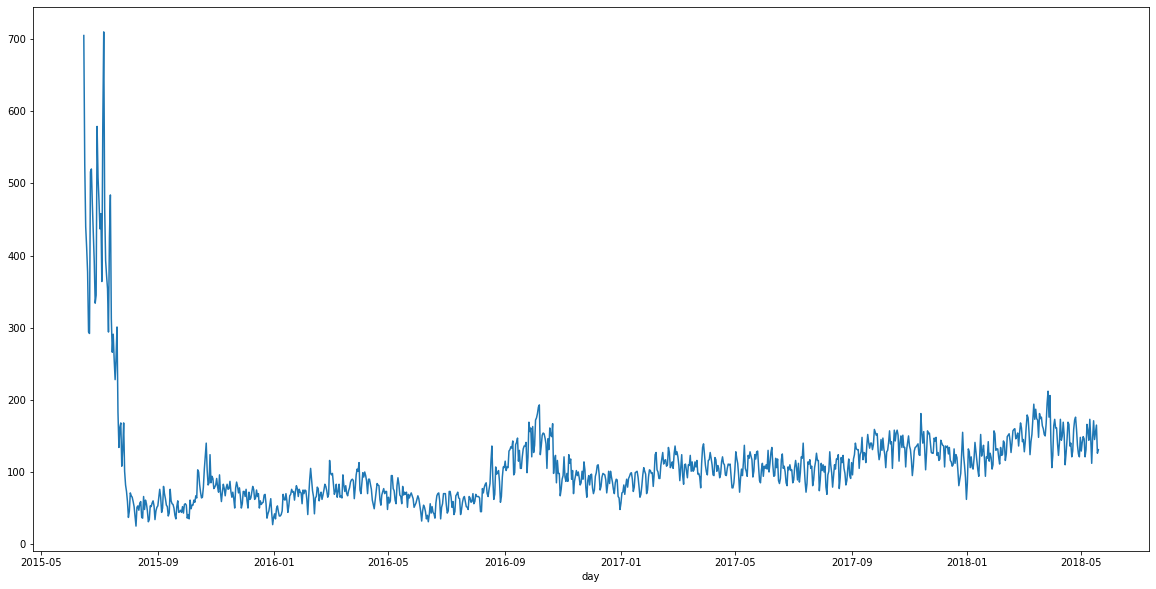

In [77]:
data.plot(figsize=(20,10))

In [78]:
# превратим дату (наш индекс) в объект datetime
data.index = pd.to_datetime(data.index)

In [79]:
data.dtypes

dtype('int64')

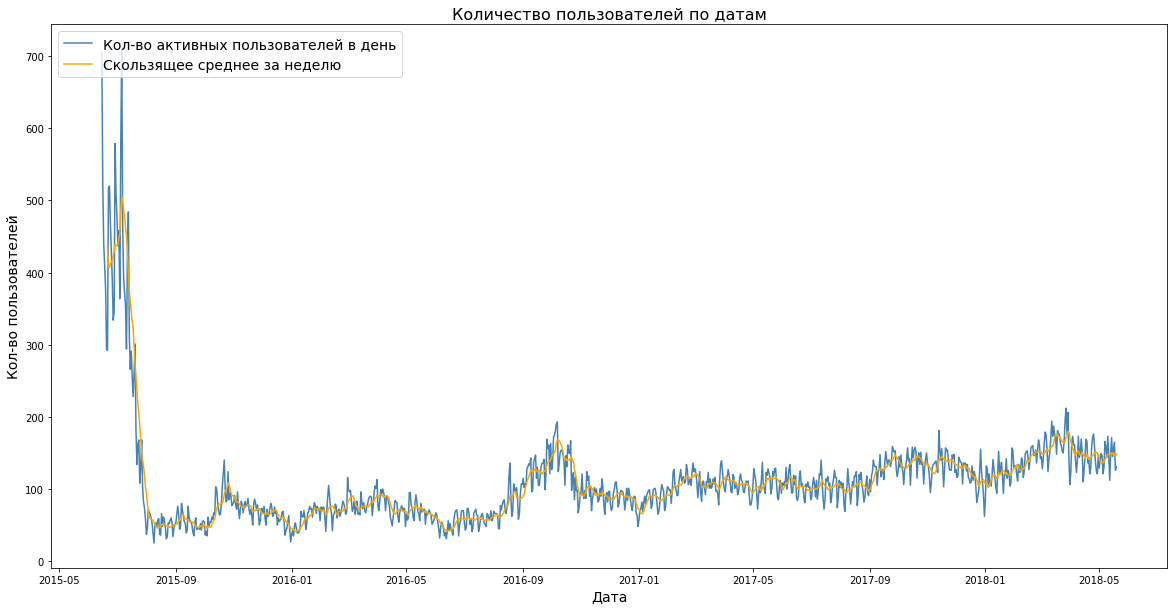

In [82]:

plt.figure(figsize = (20,10))

plt.plot(data, label = 'Кол-во активных пользователей в день', color = 'steelblue')
plt.plot(data.rolling(window = 7).mean(), label = 'Скользящее среднее за неделю', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.ylabel('Кол-во пользователей', fontsize = 14)
plt.xlabel('Дата', fontsize = 14)
plt.title('Количество пользователей по датам', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

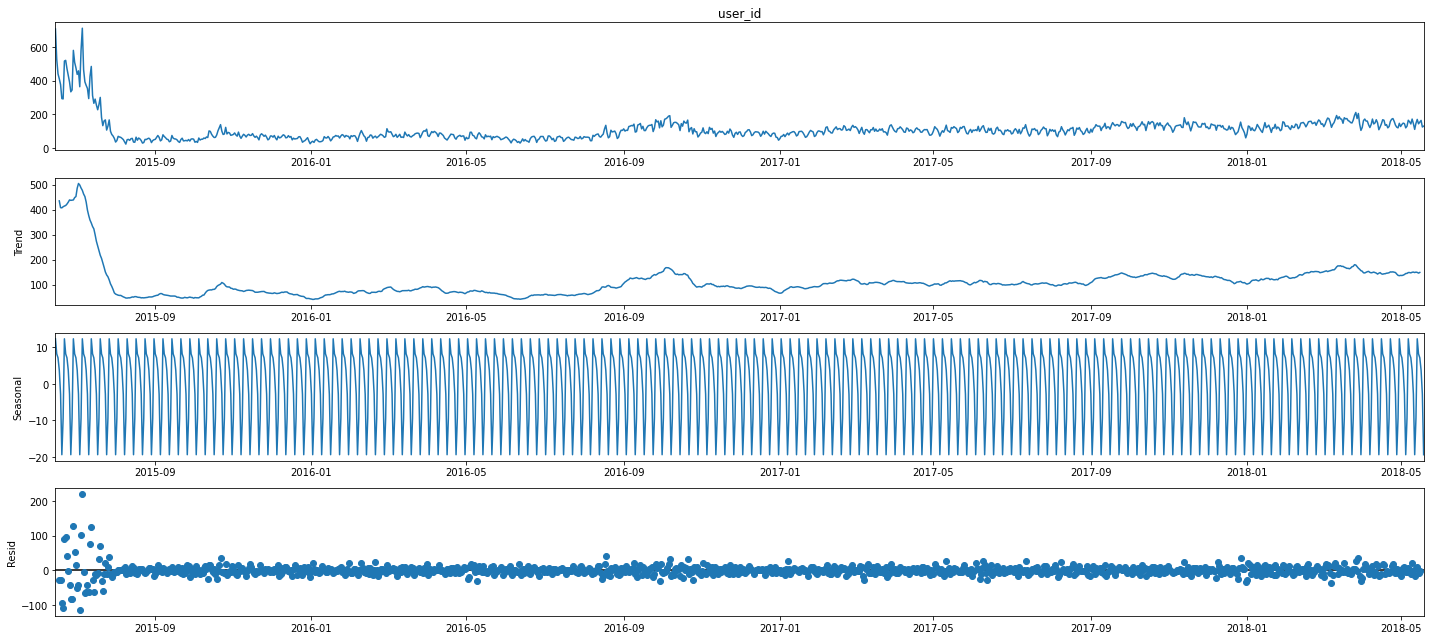

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 20, 9

# применяем функцию к данным о перевозках
decompose = seasonal_decompose(data, model='additive', filt=None)
decompose.plot()

plt.show()

In [86]:
data

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

In [88]:
# проведем тест Дики-Фуллера

from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(data)

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 4.901320136699442e-22


Результат существенно меньше 5%. Временной ряд стационарен. (то же самое мы можем наблюдать из графиков)

Проведем автокорреляцию - процес, показывающий степень взаимосвязи в одной и той же переменной в разные моменты времени.

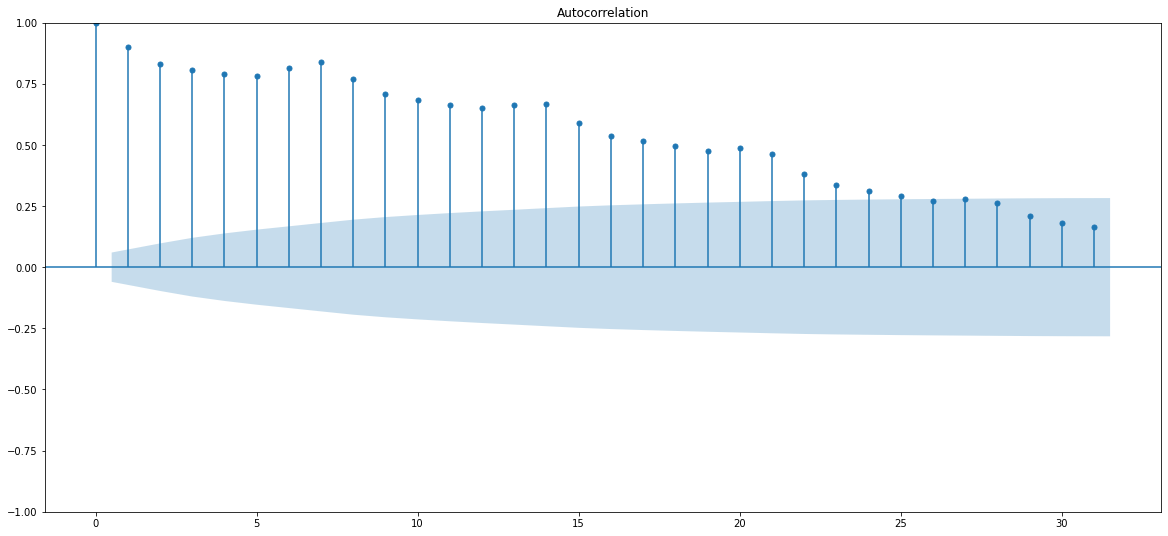

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
 
plot_acf(data)
plt.show()

In [102]:

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [103]:
# Целочисленная метка шкалы времени 
xnum = list(range(data.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = data
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [105]:
# Параметры модели (p,d,q) 
arima_order = (6, 1, 0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(int(yhat_arima))
    history_arima.append(test[t])

ddd

In [121]:
# Записываем предсказания в DataFrame
data_2=pd.DataFrame()
data_2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
data_2['day']=events_data.groupby('day', as_index=False).nunique().user_id
data_2['index']=events_data.groupby('day', as_index=False).nunique().day
data_2=data_2.set_index('index')
data_2

,predictions_ARIMA,day
index,,
2015-06-15,NaN,705
2015-06-16,NaN,526
2015-06-17,NaN,440
2015-06-18,NaN,411
2015-06-19,NaN,377
...,...,...
2018-05-15,156.0,145
2018-05-16,146.0,155
2018-05-17,166.0,165


In [107]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

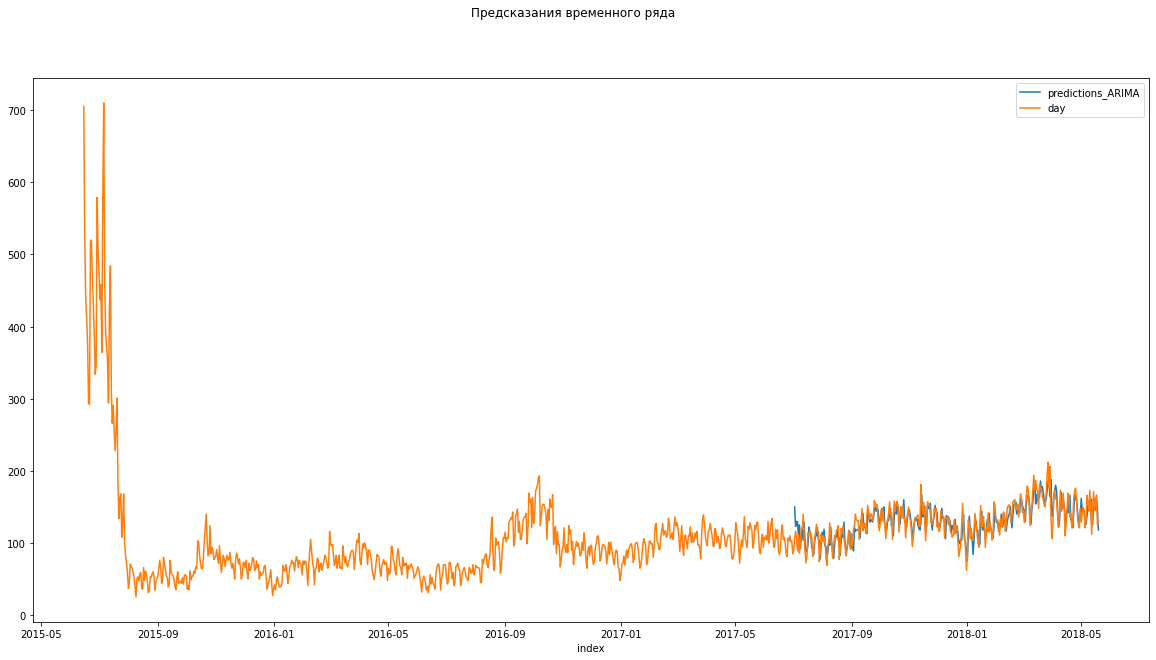

In [123]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда')
data_2.plot(ax=ax, legend=True)
pyplot.show()

In [124]:
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
error_arima_mse = mean_squared_error(test, predictions_arima, squared=False)
print("MSE:",error_arima_mse)
error_arima_r2 = r2_score(test, predictions_arima)
print("R2:",error_arima_r2)

MSE: 14.969959534799026
R2: 0.6421258374835491


In [133]:
a = pd.to_datetime("2018-05-19")
new_dates_list = []
# Параметры модели (p,d,q) 
arima_order = (6, 1, 0)
# Формирование предсказаний
predictions_arima = list()
for t in range(60):
    new_dates_list.append(a)
    a = a + pd.Timedelta("1 day")
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(int(yhat_arima))
    history_arima.append(test[t])

In [134]:

print(len(predictions_arima))
print(len(new_dates_list))

60
60


In [135]:
data_3 = data_2.drop('predictions_ARIMA', 1)

In [136]:
pred = pd.DataFrame({'Date': new_dates_list, "Actions": predictions_arima})

In [137]:
# превратим дату в индекс и сделаем изменение постоянным
pred.set_index('Date', inplace = True)
pred.head()

,Actions
Date,
2018-05-19,93
2018-05-20,96
2018-05-21,104
2018-05-22,107
2018-05-23,98


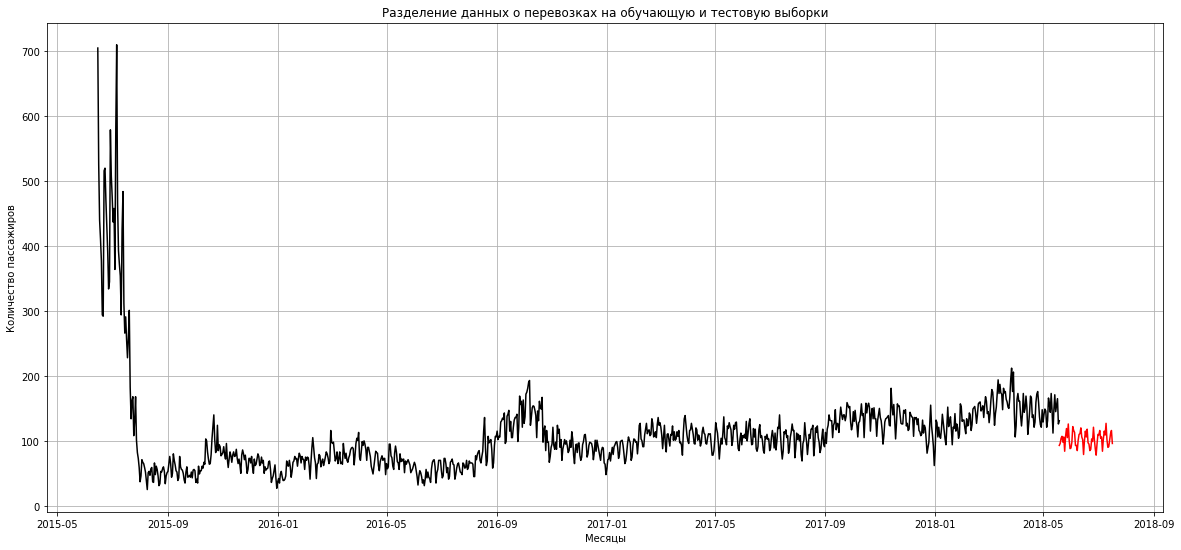

In [138]:
plt.plot(data_3, color = "black")
plt.plot(pred, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [166]:
data_3.day[:round(len(data_3.day)*0.75)]


index
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2017-08-20     92
2017-08-21    120
2017-08-22    113
2017-08-23    123
2017-08-24    105
Name: day, Length: 802, dtype: int64

c:\Users\danib\Documents\pyton\myvenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\danib\Documents\pyton\myvenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='index'>

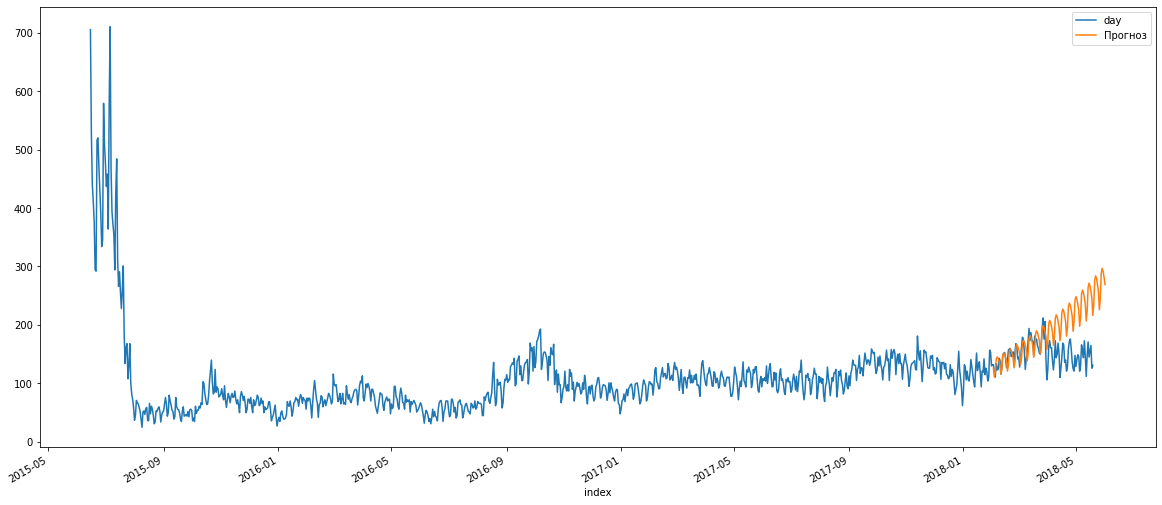

In [168]:
train = data_3.day[:round(len(data_3.day)*0.9)]
test = data_3.day[round(len(data_3.day)*0.9):]
fitted_model = ExponentialSmoothing(train, trend = 'mul', seasonal = 'mul').fit()
test_predictions = fitted_model.forecast(120)
data_3.plot(legend = True, label = 'Тренировочные данные')
test_predictions.plot(legend = True, label = 'Прогноз')

In [174]:

test_predictions = fitted_model.forecast(107)

In [175]:
error_exp_smooth_mse = mean_squared_error(test, test_predictions, squared=False)
print("MSE:",error_exp_smooth_mse)
error_exp_smooth_r2 = r2_score(test, test_predictions)
print("R2:",error_exp_smooth_r2)

MSE: 53.24101219717084
R2: -5.378140928814258
